### 확률론적 선형 회귀모형
- 만약 보스턴 집 값을 회귀분석을 통해 가중치 w1을 구했다면 해당하는 값은 신뢰할 수 있는 값인가? x
- 그럼 신뢰되는 값의 구간은 어떻게 되나?

### 부트스래핑
- 우리가 값을 정확하게 예측할 수 없는 이유는 무엇일까?
- 데이터가 부족하기 때문이다. 
- 부트스래핑은 기존의 데이터에서 리-샘플링하여 여러가지 표본 데이터 집합을 만드는 방법을 사용한다.
- 실습을 해보자
- y = w0 + w1x + e  w0 = 0, w1 = 42.3855이다

In [3]:
from sklearn.datasets import make_regression

x0, y, coef = make_regression(n_samples = 100, n_features = 1, noise = 20,
                             coef = True, random_state = 0)
coef

array(42.38550486)

In [12]:
# 이 표본 데이터를 기반으로 회귀분석을 해보자
import statsmodels.api as sm
import pandas as pd
dfx0 = pd.DataFrame(x0, columns = ["X1"])
dfX = sm.add_constant(dfx0)
dfy = pd.DataFrame(y, columns = ["y"])
model = sm.OLS(dfy, dfx)
result = model.fit()

In [13]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [14]:
%%time
# 부트스트랩 1000번
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

CPU times: user 3.83 s, sys: 38.6 ms, total: 3.87 s
Wall time: 2.13 s


Font 'default' does not have a glyph for '\ucd94' [U+cd94], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uce58' [U+ce58], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubd84' [U+bd84], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud3ec' [U+d3ec], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd94' [U+cd94], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uce58' [U+ce58], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubd84' [U+bd84], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud3ec' [U+d3ec], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd94' [U+cd94], 

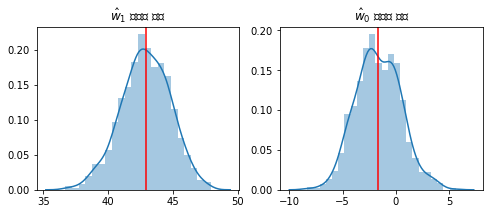

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [19]:
params_w1.mean(), params_w1.std() # 데이터가 나오는 범위는 42.877 +- 1.895 * 2

(42.87712911408495, 1.8959478833202847)

In [20]:
params_w0.mean(), params_w0.std() # 데이터가 나오는 범위는 -1.644 +- 2.105 * 2

(-1.644763088230229, 2.1057882380191204)

In [22]:
print(result.summary()) # statsmodels의 summary로 출력해보면 해당 범위가 [0.025 0.975]에 표시되어있다.
# 이 보고서의 값은 부트스트래핑을 사용하여 구한 값이 아니라 확률론적 선형 회귀모형을 사용한 것이다.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           2.21e-36
Time:                        22:00:11   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

### 확률론적 선형 회귀모형
1. 선형정규분포가정
    - 종속변수 y는 독립변수 x의 선형조합으로 결정되는 기댓값과 고정된 분산 시그마^2을 가지는 정규 분포다.
    - x, y 중 그 어느 것도 그 자체로 정규 분포일 필요는 없다.
2. 외생성 가정
    - 잡음의 기댓값은 독립변수 크기에 상관없이 항상 0이라고 가정한다.
3. 조건부 독립가정
    - i번째 표본의 잡음과 j번째 표본의 잡음의 공분산 값이 x와 상관없이 항상 0이라고 가정한다.
4. 등분산성 가정
    - 1번째 표본의 잡음과 j번째 표본의 잡음의 분산값이 표본과 상관없이 항상 같다고 가정한다.

### 단일 계수 t-검정
- 표준 오차를 구해서 w/s.e는 t분포를 따르는데 해당 검정통계량으로 w가 0인지 아닌지 검정을 실시할 수 있다.
- H0 : W = 0
    - 만약 이 검정에 대한 유의확률이 0에 가깝게 나온다면 귀무가설이 기각되어 w값이 0일 가능성은 적다.
    - 반대로 만약 이 검정에 대한 유의확률이 높으면 귀무가설이 채택되어 해당 독립변수는 종속변수와 아무런 상관성이 없을 가능성이 있다는 뜻이다

In [23]:
print(result.summary()) # 상수항은 0일 가능성이 높아 상수항을 가지지 않을 가능성이 높다고 할 수 있다.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.21e-36
Time:                        11:58:19   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

In [24]:
# result에서 W1값이 현재 42.8534인데 40이라고 할 수 없을까? 만약 40이라고하면 42보다 외우기 쉽고 상대방에게 알려주기 편하기 때문에
print(result.t_test("X1=40")) # 40으로 봐도된다.

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


In [25]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset("nottem").data 

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          2.96e-125
Time:                        12:01:20   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [26]:
# 1월과 2월의 기온의 차이는 거의 없다. 그럼 같다고 볼 수 있을까?
print(result_nottem.t_test("C(month)[01] = C(month)[02]")) # p-value가 높으므로 귀무가설 채택

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


In [27]:
print(result_nottem.t_test("C(month)[03] = C(month)[02]")) # 2월과 3월은 구분할 필요가 있다

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


### 회귀분석 F-검정
- 개별 계수가아닌 전체 회귀계수가 모두가 의미가 있는지 확인하는 경우에는 귀무가설을 모든 w값을 0으로 본다
- H0 : w0 = w1 = w2 ... = wk-1 = 0 
- 현실적으로 귀무가설이 채택될 확률이 있을까? 우리가 가지고온 변수들은 y값과 관계가 있을거 같으니 가져온건데 귀무가설이 채택될 수는 없을 것이다.
- 그럼 왜 구하는가?
    - 여러 가지 모형을 비교할때 유의확률이 낮으면 더 의미있는 모형이라고 할 수 있다 따라서 모형의 성능을 비교할때 사용한다.
- 이러한 검정을 Loss-of-Fit 혹은 회귀분석의 F검정이라고 한다.
